# HOMEWORK 14

In this homework we will be working with the Fashion MNIST dataset. You will be given a classifier which suffers from considerable overfitting. Your objective will be to employ regularization techniques to mitigate the overfitting problem.

Let's start with the usual imports.

In [15]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, Input, MaxPooling2D, BatchNormalization
from tensorflow.keras import Model
from tensorflow.keras.callbacks import EarlyStopping
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

### Dataset

The MNIST fashgion dataset [link](https://github.com/zalandoresearch/fashion-mnist) was build by Zalando Reasearch tem consists of monochrome images of different type of clothing, namely:
* 0	T-shirt/top
* 1	Trouser
* 2	Pullover
* 3	Dress
* 4	Coat
* 5	Sandal
* 6	Shirt
* 7	Sneaker
* 8	Bag
* 9	Ankle boot

It is also one of the Keras built-in datasets. Let's load the images and quickly inspect it.

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Dataset params
num_classes = 10
size = x_train.shape[1]

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train set:    60000 samples
Test set:     10000 samples
Sample dims:  (60000, 28, 28)


Let's visualise some random samples.

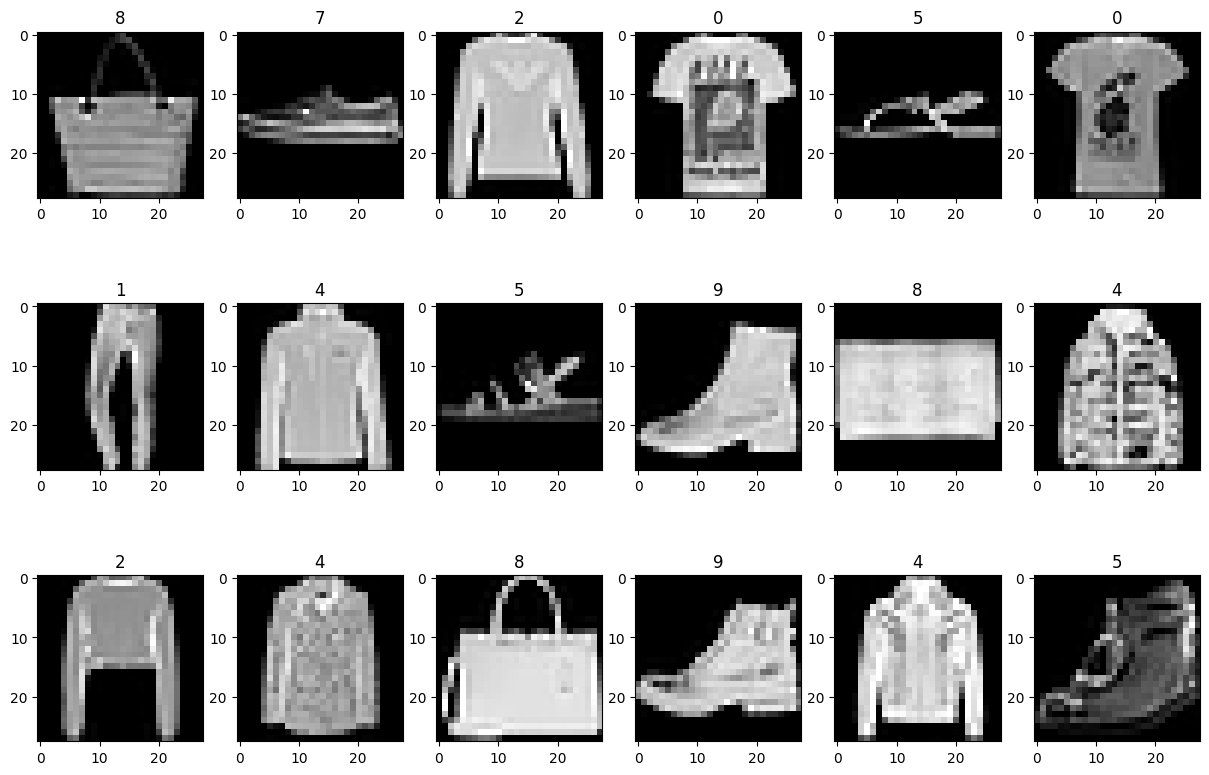

In [3]:
cnt = 1
for r in range(3):
    for c in range(6):
        idx = np.random.randint(len(x_train))
        plt.subplot(3,6,cnt)
        plt.imshow(x_train[idx, ...], cmap='gray')
        plt.title(y_train[idx])
        cnt = cnt + 1

### Building the Classifier

We are now going to build the baseline classifier that you will use throughout this homework.

In [4]:
# Data normalization
x_train = x_train/255
x_test = x_test/255

In [5]:
inputs = Input(shape=(28, 28, 1))
net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = Flatten()(net)
net = Dense(128)(net)
outputs = Dense(10, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,213,002 (12.26 MB)

 Trainable params: 3,213,002 (12.26 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
epochs = 50
batch_size = 64

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 76s 78ms/step - accuracy: 0.8162 - loss: 0.5556 - val_accuracy: 0.8778 - val_loss: 0.3360
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 80ms/step - accuracy: 0.8985 - loss: 0.2840 - val_accuracy: 0.8852 - val_loss: 0.3127
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 79s 77ms/step - accuracy: 0.9138 - loss: 0.2382 - val_accuracy: 0.8894 - val_loss: 0.3104
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 76ms/step - accuracy: 0.9267 - loss: 0.2039 - val_accuracy: 0.8890 - val_loss: 0.3220
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 72s 77ms/step - accuracy: 0.9362 - loss: 0.1788 - val_accuracy: 0.8891 - val_loss: 0.3396
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 78ms/step - accuracy: 0.9435 - loss: 0.1574 - val_accuracy: 0.8892 - val_loss: 0.3637
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 77ms/step - accuracy: 0.9507 - loss: 0.1389 - val_accuracy: 0.8896 - val_loss: 0.3797
Epoch 8/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 77ms/step - accuracy: 0.9565 - loss: 0.1228 - 

Train Acc      0.9929166436195374
Validation Acc 0.8835999965667725


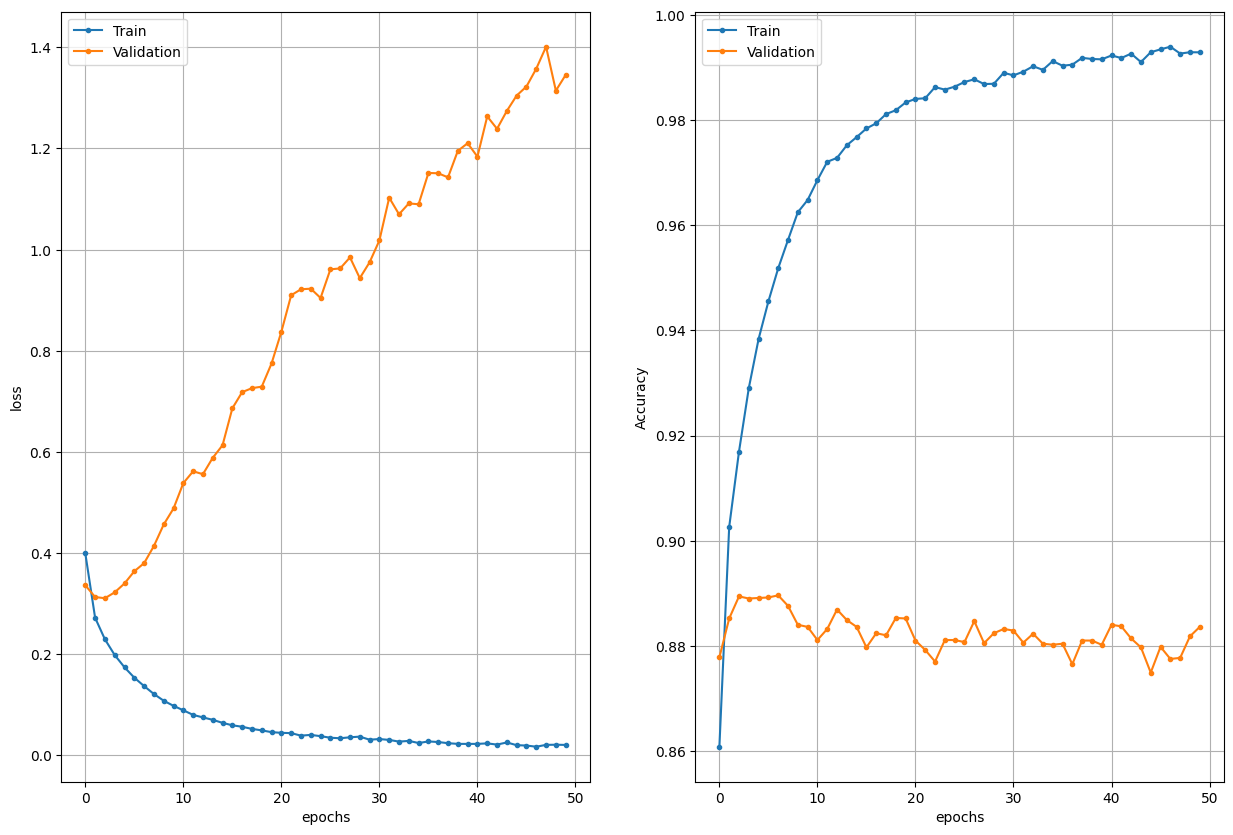

In [7]:
def plot_history(history):
    h = history.history
    epochs = range(len(h['loss']))

    plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
    plt.legend(['Train', 'Validation'])
    plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                               epochs, h['val_accuracy'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])

    print('Train Acc     ', h['accuracy'][-1])
    print('Validation Acc', h['val_accuracy'][-1])

plot_history(history)

As you can see, the classifier suffers from massive overfitting. The validation accuracy is around 88% while the training accuracy is close to 1.

### Combat the Overfitting!

Now it is your turn. Use the classifier as a baseline, include some regularization techniques and try to improve the classification performance. You can try any techniques you might see fit, e.g.,
* Dropout
* Batch normalization
* Weight regularization
* Data augmentation
* Early stopping
* Pooling
* Reducing the number of parameters (the size of the network)
* ...

There are to objective you shall fulfill in order to successfully complete this homework:
* The validation accuracy shall be above 91%
* Your network (with all the regularizations applied) shall **not** be larger than the baseline

In [10]:
# Modify the baseline classifier in order to reduce the overfitting and make the performance more robust

inputs = Input(shape=(28, 28, 1))
net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = BatchNormalization()(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Dropout(0.25)(net)

net = Conv2D(64, kernel_size=(3, 3), activation="relu", padding='same')(net)
net = BatchNormalization()(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Dropout(0.25)(net)

net = Flatten()(net)
net = Dense(64, activation="relu")(net)
net = BatchNormalization()(net)
net = Dropout(0.5)(net)

outputs = Dense(10, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │         200,768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 220,874 (862.79 KB)

 Trainable params: 220,554 (861.54 KB)

 Non-trainable params: 320 (1.25 KB)

In [19]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [20]:
# Early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [21]:
# Train the network
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping]
)

Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 121s 125ms/step - accuracy: 0.7599 - loss: 0.7115 - val_accuracy: 0.8849 - val_loss: 0.3192
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 114s 122ms/step - accuracy: 0.8761 - loss: 0.3600 - val_accuracy: 0.8943 - val_loss: 0.2898
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 140s 120ms/step - accuracy: 0.8872 - loss: 0.3225 - val_accuracy: 0.9016 - val_loss: 0.2675
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 141s 119ms/step - accuracy: 0.8960 - loss: 0.2893 - val_accuracy: 0.9055 - val_loss: 0.2596
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 142s 119ms/step - accuracy: 0.9031 - loss: 0.2724 - val_accuracy: 0.9043 - val_loss: 0.2612
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 111s 119ms/step - accuracy: 0.9055 - loss: 0.2660 - val_accuracy: 0.9133 - val_loss: 0.2372
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 111s 119ms/step - accuracy: 0.9104 - loss: 0.2524 - val_accuracy: 0.9028 - val_loss: 0.2817
Epoch 8/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 142s 119ms/step - accuracy: 0.9124 -

Train Acc      0.9300500154495239
Validation Acc 0.8985999822616577


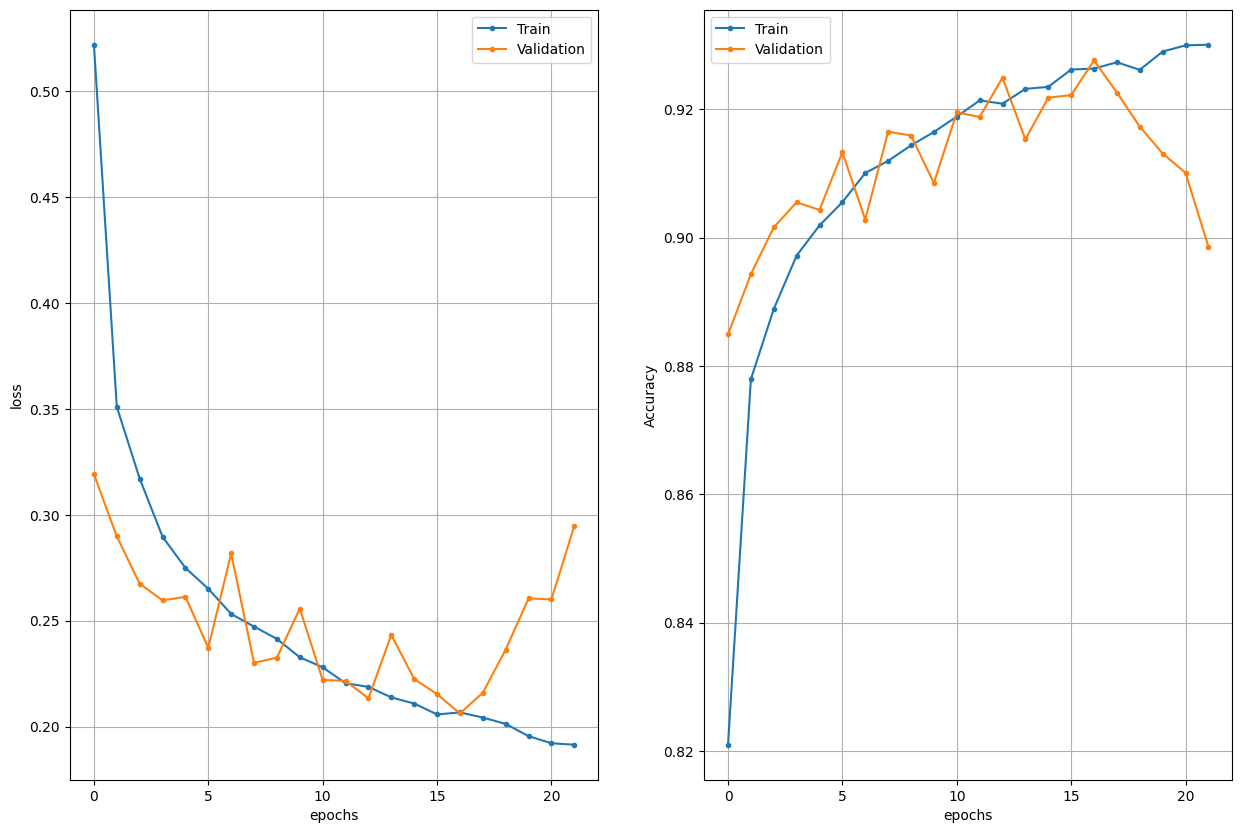

In [22]:
# Show the results

plot_history(history)


### Questions

**What have you done in order to improve the performance?**


*   Added Batch Normalization to stabilize and speed up training.
*   Introduced Dropout layers to reduce overfitting.
*   Applied Max Pooling to reduce spatial dimensions and prevent overfitting.
*   Reduced the size of the dense layer to limit the total parameter count.
*   Used Early Stopping to prevent overtraining.

**Have you tried configurations that did not work out?**
*   I tried increasing the number of filters in convolutional layers, which increased overfitting.
*   I also tried adding more dense layers, which made the model larger than the baseline.
*   L2 regularization alone without dropout, but it was insufficient to fully mitigate overfitting.